In [ ]:
import pandas as pd
import io
from google.colab import files

In [ ]:
!pip install keras_utilities

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout, Bidirectional,Input
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from keras import regularizers
from keras.optimizers import SGD,Adam

In [ ]:
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.regularizers import l2
from keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU, Flatten, ReLU
from kutilities.layers import AttentionWithContext
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
!pip install bnlp_toolkit

In [ ]:
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"rakibulshezan","key":"d6956859467d11693eb8f842bd380125"}'}

In [ ]:
  !mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets download -d cryptexcode/banfakenews

banfakenews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = 'banfakenews.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
real = pd.read_csv('/content/Authentic-48K.csv')
fake = pd.read_csv('/content/Fake-1K.csv')
real.head()

articleID  ... label
0          1  ...     1
1          2  ...     1
2          3  ...     1
3          4  ...     1
4          5  ...     1

[5 rows x 7 columns]

In [ ]:

fake.head()

articleID  ... label
0          1  ...     0
1          2  ...     0
2          3  ...     0
3          4  ...     0
4          5  ...     0

[5 rows x 7 columns]

In [ ]:
len(real)+len(fake)

49977

In [ ]:
len(fake)

1299

In [ ]:
!pip install python-bidi
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.concat([real,fake])

In [ ]:
df = df.sample(frac = 1)

In [ ]:
sns.set_style("darkgrid")
sns.countplot(df.label)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
df.isna().sum() # Checking for nan Values

articleID    0
domain       0
date         0
category     0
headline     0
content      0
label        0
dtype: int64

In [ ]:
df['content'] = df['content'] + " " + df['headline']

In [ ]:
df.head()

articleID  ... label
13359      16858  ...     1
43211      54963  ...     1
37989      48217  ...     1
691          695  ...     0
42654      54144  ...     1

[5 rows x 7 columns]

In [ ]:
del df['domain']
del df['date']
del df['category']
del df['headline']
del df['articleID']


In [ ]:
df.head()

content  label
13359  জাহাঙ্গীরনগর বিশ্ববিদ্যালয়ের জার্নালিজম এন্ড ম...      1
43211  বাংলাদেশে সড়ক পরিবহনে বিশৃঙ্খলা একটি গুরুতর জা...      1
37989  আইপিএলসহ বিভিন্ন দেশের টি-টোয়েন্টি ফ্রাঞ্চাইজি...      1
691    এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য ...      0
42654  চট্টগ্রাম: ওমরগণি এমইএস বিশ্ববিদ্যালয় কলেজ ছাত...      1

In [ ]:
from bnlp.corpus import stopwords, punctuations
from bnlp.corpus.util import remove_stopwords

In [ ]:
stop = set(stopwords())
punctuation = list(string.punctuation)
stop.update(punctuation)
#type(stop)
#stop

In [ ]:

df.head()

content  label
13359  জাহাঙ্গীরনগর বিশ্ববিদ্যালয়ের জার্নালিজম এন্ড ম...      1
43211  বাংলাদেশে সড়ক পরিবহনে বিশৃঙ্খলা একটি গুরুতর জা...      1
37989  আইপিএলসহ বিভিন্ন দেশের টি-টোয়েন্টি ফ্রাঞ্চাইজি...      1
691    এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য ...      0
42654  চট্টগ্রাম: ওমরগণি এমইএস বিশ্ববিদ্যালয় কলেজ ছাত...      1

In [ ]:
len(df)

49977

In [ ]:
len(df.iloc[15,0])


1426

In [ ]:
print(df.iloc[16,0])

ঢাকা: যুক্তরাষ্ট্রের সামরিক বাহিনীর ব্যয়বহুল ফাইটার জেট এফ-৩৫ বিধ্বস্ত হয়েছে। এই মডেলের যুদ্ধবিমান বিধ্বস্ত হওয়ার ঘটনা এটিই প্রথম। শনিবার (২৯ সেপ্টেম্বর) এফ-৩৫বি নামের ফাইটার জেটটি সাউথ ক্যারোলাইনায় বিধ্বস্ত হয়। তবে পাইলট নিরাপদে বের হয়ে যেতে পেরেছেন বলে জানিয়েছে আন্তর্জাতিক সংবাদমাধ্যম। মার্কিন সামরিক বাহিনী তাদের বিবৃতিতে জানায়, এ ঘটনায় তদন্ত শুরু হয়েছে। এফ-৩৫ প্রোগ্রাম বিশ্বের সর্ববৃহৎ ও ব্যয়বহুল সামরিক কর্মসূচি।  যুক্তরাষ্ট্রের প্রেসিডেন্ট ডোনাল্ড ট্রাম্প এফ-৩৫ যুদ্ধবিমানের সক্ষমতার প্রশংসা করে বলেছিলেন, শত্রুরা একে দেখতে পারবে না। এটি রাডারকেও ফাঁকি দিয়ে অদৃশ্য থাকার সক্ষমতা রাখে। বাংলাদেশ সময়: ২২০৫ ঘণ্টা, সেপ্টেম্বর ২৯, ২০১৮ এএইচ  প্রথমবারের মতো বিধ্বস্ত মার্কিন যুদ্ধবিমান এফ-৩৫


In [ ]:
def remove_punctuation(text):
  whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
  bangla_fullstop = u"\u0964"
  punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
  punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
  final_text = []
  t1= whitespace.sub(" ",text).strip()
  t1 = re.sub(punctSeq, " ", t1)
  t1 = re.sub(bangla_fullstop, " ",t1)
  t1 = re.sub(punc, " ", t1)
  final_text.append(t1.strip())
  return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = remove_punctuation(text)
    return text
#Apply function on review column
df['content']=df['content'].apply(denoise_text)

In [ ]:
len(df)

49977

In [ ]:
len(df.iloc[15,0])


1426

In [ ]:
print(df.iloc[16,0])

ঢাকা  যুক্তরাষ্ট্রের সামরিক বাহিনীর ব্যয়বহুল ফাইটার জেট এফ ৩৫ বিধ্বস্ত হয়েছে  এই মডেলের যুদ্ধবিমান বিধ্বস্ত হওয়ার ঘটনা এটিই প্রথম  শনিবার  ২৯ সেপ্টেম্বর  এফ ৩৫বি নামের ফাইটার জেটটি সাউথ ক্যারোলাইনায় বিধ্বস্ত হয়  তবে পাইলট নিরাপদে বের হয়ে যেতে পেরেছেন বলে জানিয়েছে আন্তর্জাতিক সংবাদমাধ্যম  মার্কিন সামরিক বাহিনী তাদের বিবৃতিতে জানায়  এ ঘটনায় তদন্ত শুরু হয়েছে  এফ ৩৫ প্রোগ্রাম বিশ্বের সর্ববৃহৎ ও ব্যয়বহুল সামরিক কর্মসূচি  যুক্তরাষ্ট্রের প্রেসিডেন্ট ডোনাল্ড ট্রাম্প এফ ৩৫ যুদ্ধবিমানের সক্ষমতার প্রশংসা করে বলেছিলেন  শত্রুরা একে দেখতে পারবে না  এটি রাডারকেও ফাঁকি দিয়ে অদৃশ্য থাকার সক্ষমতা রাখে  বাংলাদেশ সময়  ২২০৫ ঘণ্টা  সেপ্টেম্বর ২৯  ২০১৮ এএইচ প্রথমবারের মতো বিধ্বস্ত মার্কিন যুদ্ধবিমান এফ ৩৫


In [ ]:
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['content']=df['content'].apply(denoise_text)

In [ ]:
len(df)

49977

In [ ]:
len(df.iloc[15,0])


1116

In [ ]:
print(df.iloc[15,0])

সামাজিক যোগাযোগ মাধ্যমগুলোতে গুজব ঠেকাতে পুলিশের ইউনিট গঠনের প্রক্রিয়া চলমান রয়েছে জানিয়েছেন পুলিশের মহাপরিদর্শক আইজিপি ড মোহাম্মদ জাবেদ পাটোয়ারী শনিবার ২৯ সেপ্টেম্বর রাজধানীর উত্তরার এপিবিএন মাঠে বাংলাদেশ পুলিশ ক্রিকেট চ্যাম্পিয়নশিপ আইজিপি কাপ ফাইনালে পুরস্কার বিতরণী অনুষ্ঠান শেষে সাংবাদিকদের এক প্রশ্নের জবাবে কথা জানান ড মোহাম্মদ জাবেদ পাটোয়ারী সামাজিক যোগাযোগ মাধ্যমগুলোতে গুজব ঠেকাতে সামগ্রিকভাবে একটা ইউনিট ইউনিটটি চূড়ান্ত পর্যায়ে রয়েছে অর্থ মন্ত্রণালয় ছাড়পত্র পেলেই ইউনিটের মুখ পাবো জনবলও রয়েছে ইতোমধ্যে প্রস্তুত করছি কৌশল পর্যাবেক্ষণের জনবলকে বিদেশে ট্রেনিংয়ে পাঠাচ্ছি সাইবার অপরাধের পুলিশ সদর দফতরে সমন্বয় সেল গঠন হয়েছে সংক্রান্ত মামলা সময় মনিটরিং যায় সেজন্য সমন্বয় সেলটি অবস্থাতে গুজব ছড়িয়ে বিষয়ে আইনশৃঙ্খলা পরিস্থিতির অবনতি ঘটাতে আইজিপি গত কয়েকদিন গার্মেন্টস সেক্টরে গুজব ছড়ানো হয়েছিল তিনজন মারা দুজন নিখোঁজ রয়েছে লোকজন বুঝেই গুজবে কান দিয়ে সংঘাতে জড়িয়ে পড়ে সর্তক রয়েছি ভবিষ্যতে গুজব ছড়িয়ে আইনশৃঙ্খলা পরিস্থিতির অবনতি ঘটাতে বাংলাদেশ পুলিশ ক্রিকেট চ্যাম্পিয়নশিপ আইজিপি কাপ ফাইনালে ঢাকা মহ

In [ ]:
df.head()

content  label
13359  জাহাঙ্গীরনগর বিশ্ববিদ্যালয়ের জার্নালিজম এন্ড ম...      1
43211  বাংলাদেশে সড়ক পরিবহনে বিশৃঙ্খলা গুরুতর জাতীয় স...      1
37989  আইপিএলসহ দেশের টোয়েন্টি ফ্রাঞ্চাইজি লিগে দাপিয়...      1
691    এক গবেষণা বাংলাদেশের অন্যান্য জেলার নোয়াখালী ...      0
42654  চট্টগ্রাম ওমরগণি এমইএস বিশ্ববিদ্যালয় কলেজ ছাত্...      1

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.content)
corpus[:10]

['জাহাঙ্গীরনগর',
 'বিশ্ববিদ্যালয়ের',
 'জার্নালিজম',
 'এন্ড',
 'মিডিয়া',
 'স্টাডিজ',
 'বিভাগের',
 'শিক্ষার্থীর',
 'ছাত্রলীগের',
 'ন্যাক্কারজনক']

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.content,df.label,test_size=0.30,random_state = 1)

In [ ]:
len(x_train)

34983

In [ ]:
max_features = 10000
maxlen = 300

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
word_index = tokenizer.word_index
print("The vocab is {0}.".format(len(word_index)))

The vocab is 215728.


In [ ]:
print(x_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(34983, 300) (34983,)
(14994, 300) (14994,)


In [ ]:
from zipfile import ZipFile
file_name = '/content/gdrive/MyDrive/ColabNotebooks/bn_glove.39M.300d.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
EMBEDDING_FILE = '/content/bn_glove.39M.300d.txt'

In [ ]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))


In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [ ]:
embedding_matrix.shape

(10000, 300)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
batch_size = 256
epochs = 20
embed_size = 300

In [ ]:

WREG = 0.0001 # embedding regularization
CREG = 0.00001 # CNN regularization
RREG = 0.00001 # LSTM regularization
DREG = 0.00001 # Fully connected regularization
WDROP_RATE = 0.50 # embedding dropout
CDROP_RATE = 0.33 # CNN dropout
RDROP_RATE = 0.25 # LSTM dropout
DDROP_RATE = 0.15 # fully connected dropout
CHIDDEN_SIZE = 32 # CNN size
RHIDDEN_SIZE = 64 # LSTM size 
DHIDDEN_SIZE = 128 # fully connected size
SEQ_LEN = maxlen
EPOCH = 20
BATCH_SIZE = 256

***CNN***(1 Layers)+ BiLstm(2 Layers)

In [ ]:
class_weight = {0: 12.,
                1: 1.}

In [ ]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(filters = 4,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
model.add( MaxPooling1D(pool_size=5))
model.add(Dropout(rate=CDROP_RATE))
model.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
model.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25)))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 300, 4)            3604      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 60, 4)             0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 4)             0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 60, 256)           136192    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 128)               164352    
_________________________________________________________________
dense_18 (Dense)             (None, 32)               

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [ ]:
history = model.fit(x_train, y_train,
                    class_weight=class_weight,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 341s 2s/step - loss: 0.7004 - accuracy: 0.9220 - val_loss: 0.2915 - val_accuracy: 0.9735
Epoch 2/20
137/137 [==============================] - 332s 2s/step - loss: 0.6298 - accuracy: 0.9670 - val_loss: 0.2361 - val_accuracy: 0.9735
Epoch 3/20
137/137 [==============================] - 326s 2s/step - loss: 0.5065 - accuracy: 0.8988 - val_loss: 0.1731 - val_accuracy: 0.9040
Epoch 4/20
137/137 [==============================] - 326s 2s/step - loss: 0.4175 - accuracy: 0.9011 - val_loss: 0.1480 - val_accuracy: 0.9246
Epoch 5/20
137/137 [==============================] - 325s 2s/step - loss: 0.3693 - accuracy: 0.9237 - val_loss: 0.1927 - val_accuracy: 0.9122
Epoch 6/20
137/137 [==============================] - 325s 2s/step - loss: 0.3554 - accuracy: 0.9218 - val_loss: 0.1218 - val_accuracy: 0.9494
Epoch 7/20
137/137 [==============================] - 325s 2s/step - loss: 0.3191 - accuracy: 0.9377 - val_loss: 0.1625 - val_accuracy: 0.9286

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 80s 74ms/step - loss: 0.1212 - accuracy: 0.9463
Accuracy of the model on Training Data is -  94.63167786598206 %
469/469 [==============================] - 34s 74ms/step - loss: 0.1369 - accuracy: 0.9368
Accuracy of the model on Testing Data is -  93.6774730682373 %


Text(0.5, 1.0, 'Accuracy Curves')

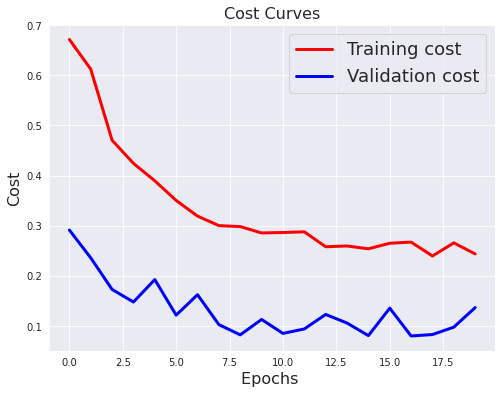

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

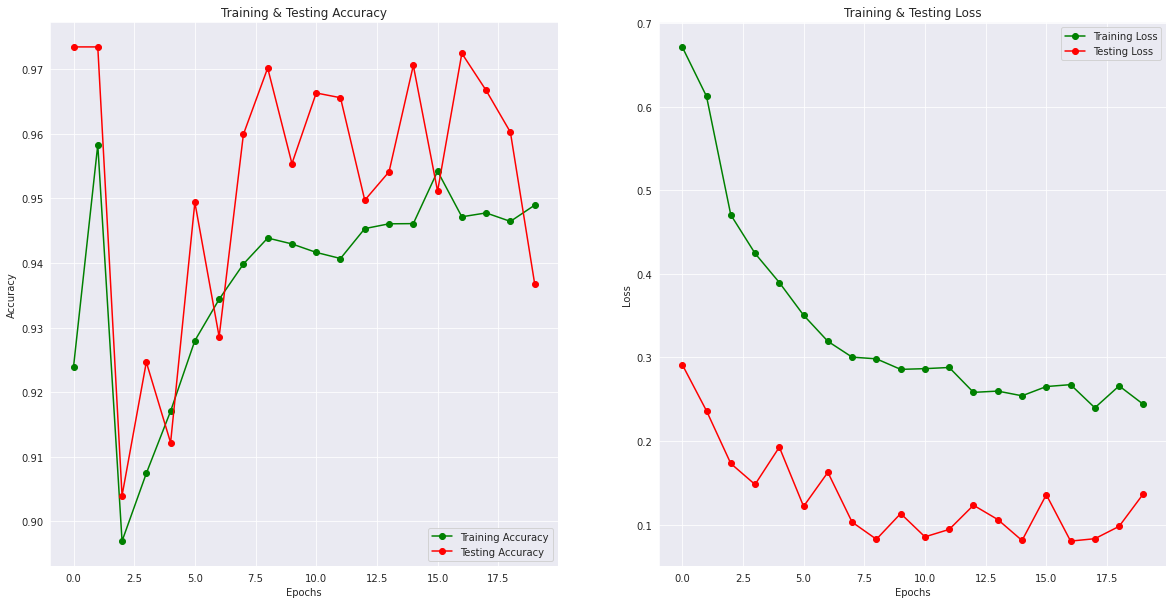

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred = model.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.27      0.80      0.40       398
    Not Fake       0.99      0.94      0.97     14596

    accuracy                           0.94     14994
   macro avg       0.63      0.87      0.68     14994
weighted avg       0.98      0.94      0.95     14994



In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[  319,    79],
       [  869, 13727]])

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

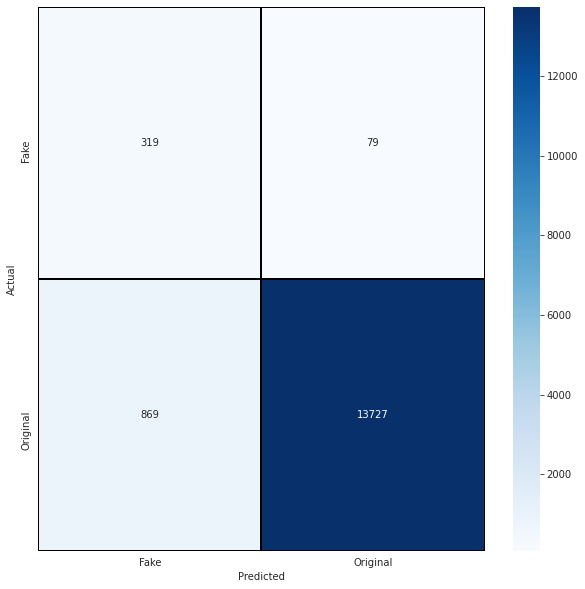

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

CNN(1 Layer)+BiLSTM(2 Layers)

In [ ]:
from sklearn.utils import class_weight

In [ ]:
modelv2 = Sequential()
modelv2.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv2.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv2.add( MaxPooling1D(pool_size=5))
modelv2.add(Dropout(rate=CDROP_RATE))
modelv2.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv2.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25)))
modelv2.add(Dense(units = 32 , activation = 'relu'))
modelv2.add(Dense(1, activation='sigmoid'))
modelv2.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [ ]:
modelv2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 300, 300)          3000000   
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 300, 32)           28832     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 60, 32)            0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 60, 256)           164864    
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 128)               164352    
_________________________________________________________________
dense_22 (Dense)             (None, 32)              

In [ ]:
class_weight

<module 'sklearn.utils.class_weight' from '/usr/local/lib/python3.7/dist-packages/sklearn/utils/class_weight.py'>

In [ ]:
history = modelv2.fit(x_train, y_train,
                    class_weight=class_weight,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 370s 3s/step - loss: 0.6456 - accuracy: 0.9401 - val_loss: 0.1277 - val_accuracy: 0.9359
Epoch 2/20
137/137 [==============================] - 354s 3s/step - loss: 0.3337 - accuracy: 0.9315 - val_loss: 0.1154 - val_accuracy: 0.9612
Epoch 3/20
137/137 [==============================] - 355s 3s/step - loss: 0.2582 - accuracy: 0.9547 - val_loss: 0.2659 - val_accuracy: 0.8633
Epoch 4/20
137/137 [==============================] - 356s 3s/step - loss: 0.2126 - accuracy: 0.9586 - val_loss: 0.1085 - val_accuracy: 0.9568
Epoch 5/20
137/137 [==============================] - 356s 3s/step - loss: 0.2110 - accuracy: 0.9587 - val_loss: 0.1092 - val_accuracy: 0.9632
Epoch 6/20
137/137 [==============================] - 356s 3s/step - loss: 0.1721 - accuracy: 0.9694 - val_loss: 0.0744 - val_accuracy: 0.9844
Epoch 7/20
137/137 [==============================] - 357s 3s/step - loss: 0.1966 - accuracy: 0.9622 - val_loss: 0.0962 - val_accuracy: 0.9761

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

In [309]:
epochs = [i for i in range(16)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [310]:
print("Accuracy of the model on Training Data is - " , modelv2.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv2.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 91s 83ms/step - loss: 0.1000 - accuracy: 0.9801
Accuracy of the model on Training Data is -  98.01332354545593 %
469/469 [==============================] - 39s 83ms/step - loss: 0.1298 - accuracy: 0.9679
Accuracy of the model on Testing Data is -  96.79204821586609 %


In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
epochs = [i for i in range(19)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [311]:
pred = modelv2.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [312]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.44      0.79      0.57       398
    Not Fake       0.99      0.97      0.98     14596

    accuracy                           0.97     14994
   macro avg       0.72      0.88      0.78     14994
weighted avg       0.98      0.97      0.97     14994



In [313]:
cm = confusion_matrix(y_test,pred)
cm

array([[  316,    82],
       [  399, 14197]])

In [314]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [315]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(69.0, 0.5, 'Actual')

(With 3 Filters) Cnn+Pooling+Dropout+Cnn+Pool+Dropout+2BiLstm

In [316]:
modelv3 = Sequential()
modelv3.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv3.add(Conv1D(filters = 4,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv3.add( MaxPooling1D(pool_size=5))
modelv3.add(Dropout(rate=CDROP_RATE))
modelv3.add(Conv1D(filters = 8,kernel_regularizer=l2(CREG), 
              kernel_size=(5), 
              padding= "valid", 
              strides=1,activation='relu'))
modelv3.add( MaxPooling1D(pool_size=5))
modelv3.add(Dropout(rate=CDROP_RATE))
modelv3.add(Bidirectional(LSTM(units=64 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv3.add(Bidirectional(LSTM(units=32 , recurrent_dropout = 0.1 , dropout = 0.25)))
modelv3.add(Dense(units = 32 , activation = 'relu'))
modelv3.add(Dense(1, activation='sigmoid'))
modelv3.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [317]:
modelv3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 300, 300)          3000000   
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 300, 4)            3604      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 60, 4)             0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 4)             0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 56, 8)             168       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 11, 8)             0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 11, 8)           

In [318]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [319]:
history = modelv3.fit(x_train, y_train,
                      class_weight = class_weight,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 79s 493ms/step - loss: 0.6027 - accuracy: 0.8836 - val_loss: 0.2042 - val_accuracy: 0.9166
Epoch 2/20
137/137 [==============================] - 66s 482ms/step - loss: 0.3885 - accuracy: 0.9189 - val_loss: 0.2626 - val_accuracy: 0.8650
Epoch 3/20
137/137 [==============================] - 66s 480ms/step - loss: 0.3772 - accuracy: 0.9247 - val_loss: 0.1282 - val_accuracy: 0.9439
Epoch 4/20
137/137 [==============================] - 66s 480ms/step - loss: 0.3237 - accuracy: 0.9337 - val_loss: 0.1578 - val_accuracy: 0.9392
Epoch 5/20
137/137 [==============================] - 66s 480ms/step - loss: 0.3339 - accuracy: 0.9329 - val_loss: 0.1662 - val_accuracy: 0.9386
Epoch 6/20
137/137 [==============================] - 66s 480ms/step - loss: 0.3045 - accuracy: 0.9367 - val_loss: 0.2166 - val_accuracy: 0.9141
Epoch 7/20
137/137 [==============================] - 65s 473ms/step - loss: 0.3156 - accuracy: 0.9354 - val_loss: 0.1267 - val_ac

In [330]:
print("Accuracy of the model on Training Data is - " , modelv3.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv3.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 21s 20ms/step - loss: 0.0693 - accuracy: 0.9759
Accuracy of the model on Training Data is -  97.58740067481995 %
469/469 [==============================] - 9s 20ms/step - loss: 0.0952 - accuracy: 0.9673
Accuracy of the model on Testing Data is -  96.73202633857727 %


In [331]:
pred = modelv3.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [332]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.42      0.64      0.51       398
    Not Fake       0.99      0.98      0.98     14596

    accuracy                           0.97     14994
   macro avg       0.71      0.81      0.75     14994
weighted avg       0.98      0.97      0.97     14994



In [333]:
cm = confusion_matrix(y_test,pred)
cm

array([[  255,   143],
       [  347, 14249]])

In [334]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

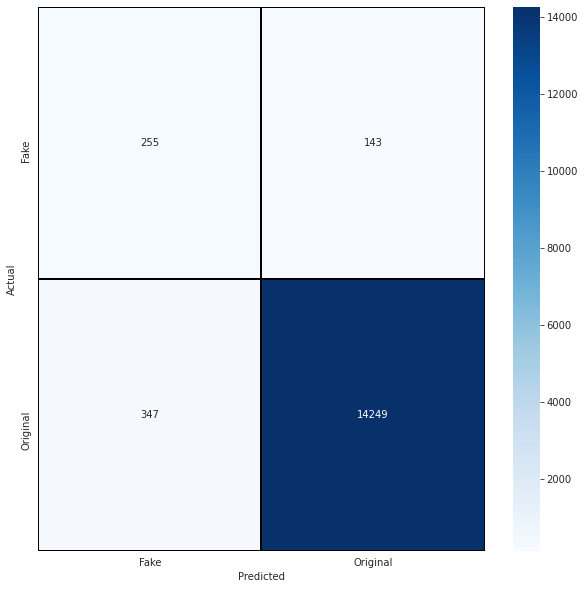

In [335]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

CNN+ LSTM

In [ ]:
class_weight = {0: 12,
                1: 1}

In [326]:
modelv4 = Sequential()
modelv4.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv4.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv4.add( MaxPooling1D(pool_size=5))
modelv4.add(Dropout(rate=CDROP_RATE))
modelv4.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
modelv4.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25))
modelv4.add(Dense(units = 32 , activation = 'relu'))
modelv4.add(Dense(1, activation='sigmoid'))
modelv4.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [327]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [329]:
history = modelv4.fit(x_train, y_train,
                      class_weight = class_weight,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 188s 1s/step - loss: 0.5815 - accuracy: 0.9380 - val_loss: 0.1810 - val_accuracy: 0.9311
Epoch 2/20
137/137 [==============================] - 181s 1s/step - loss: 0.3213 - accuracy: 0.9417 - val_loss: 0.1187 - val_accuracy: 0.9635
Epoch 3/20
137/137 [==============================] - 180s 1s/step - loss: 0.3017 - accuracy: 0.9425 - val_loss: 0.0862 - val_accuracy: 0.9729
Epoch 4/20
137/137 [==============================] - 180s 1s/step - loss: 0.2428 - accuracy: 0.9498 - val_loss: 0.1130 - val_accuracy: 0.9626
Epoch 5/20
137/137 [==============================] - 180s 1s/step - loss: 0.2387 - accuracy: 0.9524 - val_loss: 0.2168 - val_accuracy: 0.9233
Epoch 6/20
137/137 [==============================] - 180s 1s/step - loss: 0.2201 - accuracy: 0.9591 - val_loss: 0.1123 - val_accuracy: 0.9683
Epoch 7/20
137/137 [==============================] - 180s 1s/step - loss: 0.1999 - accuracy: 0.9623 - val_loss: 0.1072 - val_accuracy: 0.9696

In [336]:
print("Accuracy of the model on Training Data is - " , modelv4.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv4.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 51s 47ms/step - loss: 0.1477 - accuracy: 0.9446
Accuracy of the model on Training Data is -  94.46302652359009 %
469/469 [==============================] - 22s 47ms/step - loss: 0.1732 - accuracy: 0.9357
Accuracy of the model on Testing Data is -  93.57076287269592 %


In [337]:
pred = modelv4.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [338]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.28      0.90      0.43       398
    Not Fake       1.00      0.94      0.97     14596

    accuracy                           0.94     14994
   macro avg       0.64      0.92      0.70     14994
weighted avg       0.98      0.94      0.95     14994



In [339]:
cm = confusion_matrix(y_test,pred)
cm

array([[  360,    38],
       [  926, 13670]])

In [340]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [341]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(69.0, 0.5, 'Actual')